# **Coffee Shop Sales Analysis** <a id=0></a>
**Objective:** I believe that caffeine affects the human brain, and I often drink espresso when I need to focus on my work. Since I enjoy coffee, I was interested in analyzing coffee sales to understand what people are drinking and which types of drinks are the most popular. I divided this analysis into several categories to examine how coffee sales have changed over time.

**Data Source:** https://www.kaggle.com/datasets/divu2001/coffee-shop-sales-analysis/data

## **Analysis Overview**
### [1.Customer Analysis](#1)
### [2.Geographical Analysis](#2)
### [3.Trend Analysis](#3)
### [4.Summary of Analysis](#4)

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv("coffee_sales.csv")
df.head()

,transaction_id,transaction_date,transaction_time,store_id,store_location,product_id,transaction_qty,unit_price,Total_Bill,product_category,product_type,product_detail,Size,Month Name,Day Name,Hour,Month,Day of Week
0,114301,01-06-2023,11:33:29,3,Astoria,45,1,3.0,3.0,Tea,Brewed herbal tea,Peppermint,Large,June,Thursday,11,6,3
1,115405,02-06-2023,11:18:24,3,Astoria,45,1,3.0,3.0,Tea,Brewed herbal tea,Peppermint,Large,June,Friday,11,6,4
2,115478,02-06-2023,12:02:45,3,Astoria,45,1,3.0,3.0,Tea,Brewed herbal tea,Peppermint,Large,June,Friday,12,6,4
3,116288,02-06-2023,19:39:47,3,Astoria,45,1,3.0,3.0,Tea,Brewed herbal tea,Peppermint,Large,June,Friday,19,6,4
4,116714,03-06-2023,12:24:57,3,Astoria,45,1,3.0,3.0,Tea,Brewed herbal tea,Peppermint,Large,June,Saturday,12,6,5


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149116 entries, 0 to 149115
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   transaction_id    149116 non-null  int64  
 1   transaction_date  149116 non-null  object 
 2   transaction_time  149116 non-null  object 
 3   store_id          149116 non-null  int64  
 4   store_location    149116 non-null  object 
 5   product_id        149116 non-null  int64  
 6   transaction_qty   149116 non-null  int64  
 7   unit_price        149116 non-null  float64
 8   Total_Bill        149116 non-null  float64
 9   product_category  149116 non-null  object 
 10  product_type      149116 non-null  object 
 11  product_detail    149116 non-null  object 
 12  Size              149116 non-null  object 
 13  Month Name        149116 non-null  object 
 14  Day Name          149116 non-null  object 
 15  Hour              149116 non-null  int64  
 16  Month             14

In [5]:
# Check for any missing values
df.isnull().sum()

transaction_id      0
transaction_date    0
transaction_time    0
store_id            0
store_location      0
product_id          0
transaction_qty     0
unit_price          0
Total_Bill          0
product_category    0
product_type        0
product_detail      0
Size                0
Month Name          0
Day Name            0
Hour                0
Month               0
Day of Week         0
dtype: int64

In [6]:
# Check for any duplicated values
df[df.duplicated()]

,transaction_id,transaction_date,transaction_time,store_id,store_location,product_id,transaction_qty,unit_price,Total_Bill,product_category,product_type,product_detail,Size,Month Name,Day Name,Hour,Month,Day of Week


In [7]:
df = df.rename(columns = {"Total_Bill" : "total_bill", "Size": "size", "Month Name": "month_name", "Day Name": "day",
                       "Hour": "hour", "Month": "month", "Day of Week": "day_of_week"})

<a id=1></a>
## Customer Analysis
* What categories of drinks do people buy the most?
* What type of product is in the top 10 best sellers?
* Which size of drink do people order the most?

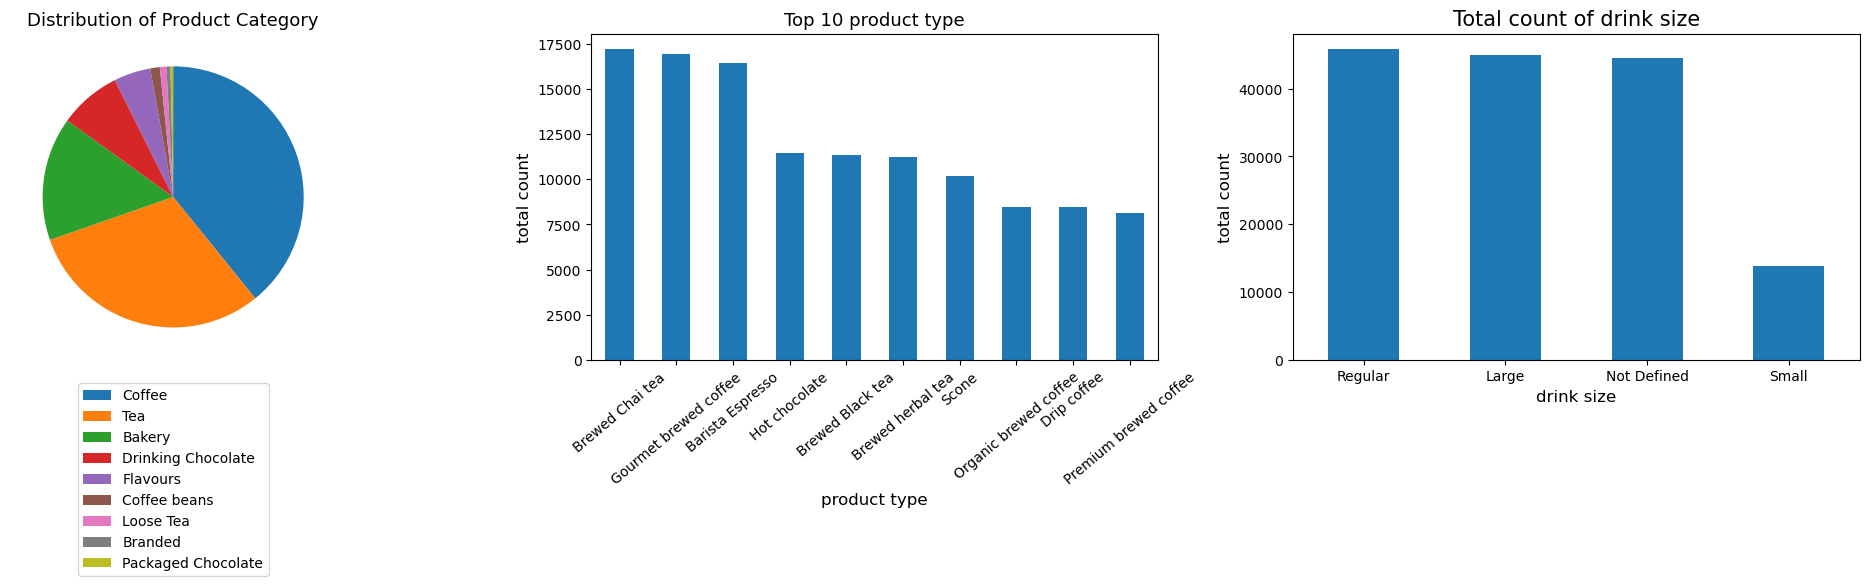

In [8]:
plt.figure(figsize=(20,6))
plt.subplot(1,3,1)
cnt_cat = df["product_category"].value_counts()
plt.pie(cnt_cat, counterclock = False, startangle=90)
plt.title("Distribution of Product Category", fontsize = 13)
plt.legend(labels = cnt_cat.index, loc='upper center', bbox_to_anchor=(0.5, -0.05))

plt.subplot(1,3,2)
product_type = df.groupby("product_type")["product_type"].count().sort_values(ascending = False).head(10)
product_type.plot(kind = "bar")
plt.title("Top 10 product type", fontsize = 13)
plt.xlabel("product type", fontsize = 12)
plt.ylabel("total count", fontsize = 12)
plt.xticks(rotation = 40, fontsize = 10)

plt.subplot(1,3,3)
cnt_size = df.groupby("size")["size"].value_counts().sort_values(ascending = False)
cnt_size.plot(kind = "bar")
plt.title("Total count of drink size", fontsize = 15)
plt.xlabel("drink size", fontsize = 12)
plt.ylabel("total count", fontsize = 12)
plt.xticks(rotation=360)

plt.tight_layout()
plt.show()

## **Insight**
* Coffee is the product category that customers bought the most.
* Brewed Chai tea is the most popular drink, even though tea is the second-highest product category. 
* Scones are the snacks that could potentially affect sales, as they are in the top 10 products surpassing various drinks. 
* Customers mostly order regular or large size, but many drink sizes are not specified. 

[To the top](#0)

# Geographical Analysis <a id=2></a>
* Which store location has the highest sales?
* Which size of drink is sold the most by location?

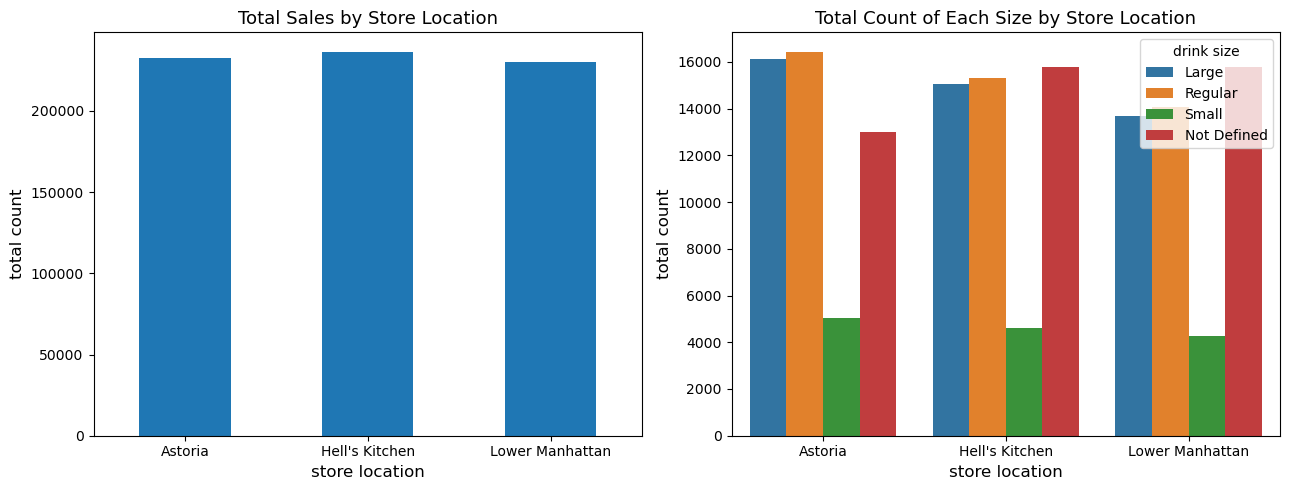

In [161]:
sales_location = df[["store_location", "total_bill"]].groupby("store_location")["total_bill"].sum()

plt.figure(figsize=(13,5))
plt.subplot(1,2,1)
sales_location.plot(kind = "bar")
plt.title("Total Sales by Store Location", fontsize = 13)
plt.xlabel("store location", fontsize = 12)
plt.ylabel("total count", fontsize = 12)
plt.xticks(rotation = 360)

plt.subplot(1,2,2)
cnt_size_loc = df[["store_location", "size"]].groupby(["store_location", "size"])[["size"]].count().rename(columns={"size": "total_count"}).reset_index()
cnt_size_loc["size"] = pd.Categorical(cnt_size_loc["size"], categories=["Large", "Regular", "Small", "Not Defined"], ordered=True)
sns.barplot(data=cnt_size_loc, x="store_location", y="total_count", hue="size")
plt.title("Total Count of Each Size by Store Location", fontsize = 13)
plt.xlabel("store location", fontsize = 12)
plt.ylabel("total count", fontsize = 12)
plt.xticks(rotation=360)
plt.legend(title="drink size")

plt.tight_layout()
plt.show()

## **Insight**
* The sales among the three different locations are very close.
* Regardless of the store location, regular and large size are more popular than small size.

[To the top](#0)

# Trend Analysis <a id=3></a>
* Monthly Sales Trend
* Sales Trend by Store location
* Sales Trend by Product category
* Sales Trend by Hour
* Total Sales by Day of the week

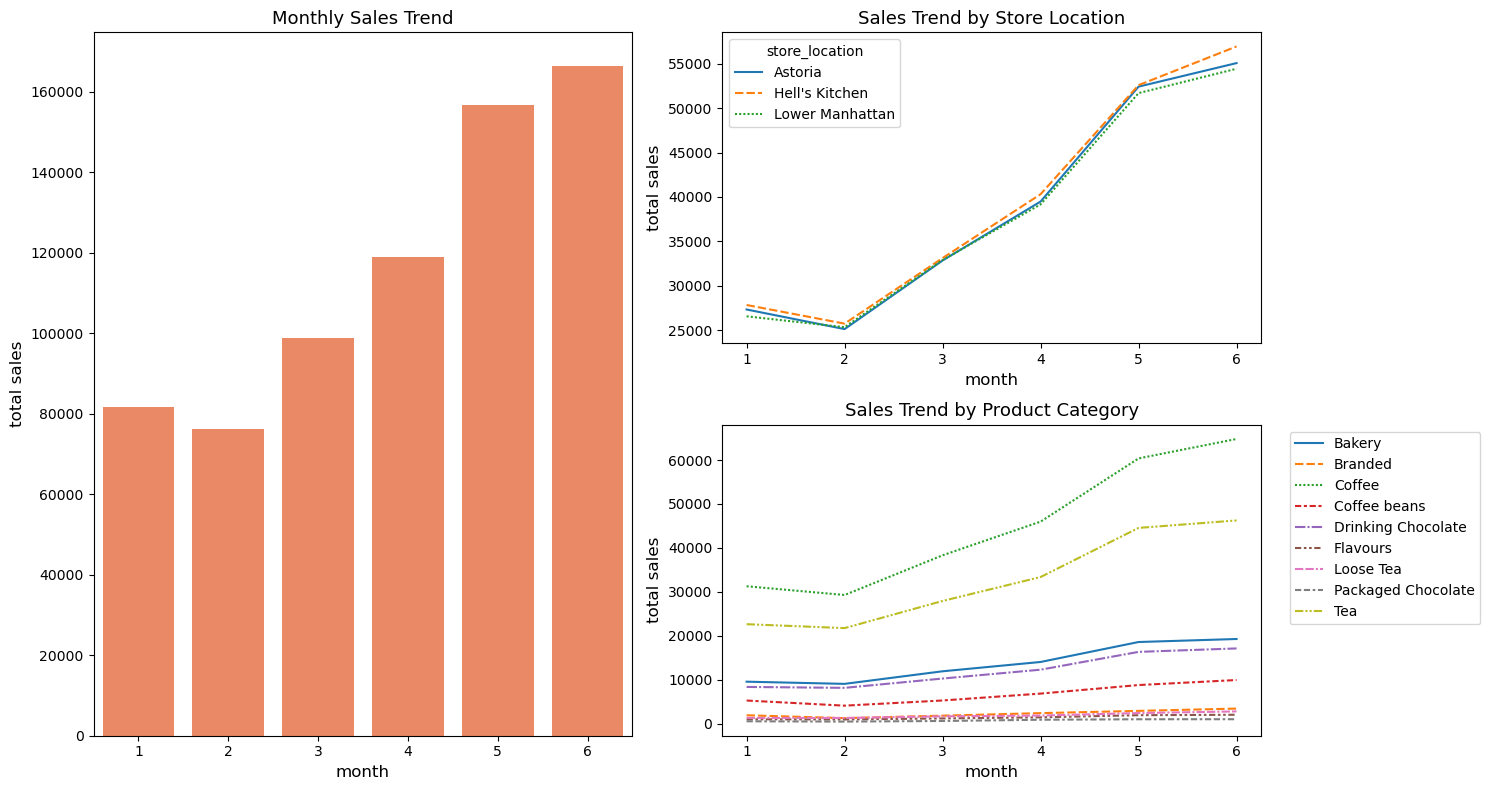

In [166]:
plt.figure(figsize=(15, 8))
plt.subplot(1,2,1)

# Monthly Sales Trend
monthly_sales = df.groupby("month")[["total_bill"]].sum().reset_index()
sns.barplot(data=monthly_sales, x="month", y="total_bill", color="coral")
plt.title("Monthly Sales Trend", fontsize = 13)
plt.xlabel("month", fontsize = 12)
plt.ylabel("total sales", fontsize = 12)

# Sales Trend by Store Location
sales_location_month = df[["month", "store_location", "total_bill"]].groupby(["month", "store_location"])["total_bill"].sum().unstack()
plt.subplot(2,2,2)
sns.lineplot(data=sales_location_month)
plt.title("Sales Trend by Store Location", fontsize = 13)
plt.xlabel("month", fontsize = 12)
plt.ylabel("total sales", fontsize = 12)

# Sales Trend by Product Category
sales_category_month = df[["month", "total_bill", "product_category"]].groupby(["month", "product_category"])["total_bill"].sum().unstack()
plt.subplot(2,2,4)
sns.lineplot(data = sales_category_month)
plt.title("Sales Trend by Product Category", fontsize = 13)
plt.xlabel("month", fontsize = 12)
plt.ylabel("total sales", fontsize = 12)
plt.legend(bbox_to_anchor=(1.04, 1), loc="upper left")

plt.tight_layout()
plt.show()

## **Insight**
* Since the sales have doubled from January to June, drinks tend to sell well in the summer season
* All sales among the three different locations decreased in February, but sales similarly increased for the rest of the months
* In the graph of the sales trend by product category, some of them are consistent, but sales remarkably increased for coffee and tea. 
* February is a transition month, which could affect sales because the demand for hot drinks diminishes. 

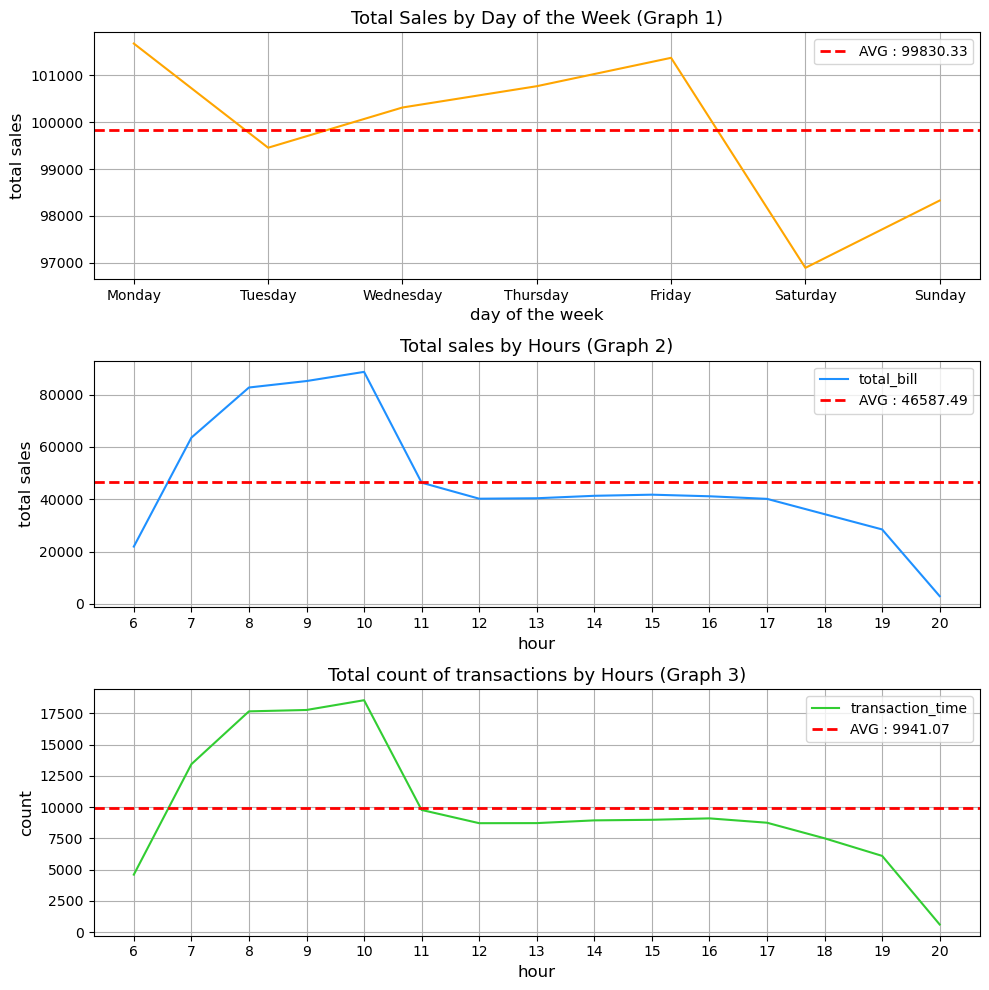

In [168]:
sales_day_of_week = df[["day", "day_of_week", "total_bill"]].groupby(["day", "day_of_week"])["total_bill"].sum().sort_index(level = 1)
sales_day_of_week = pd.DataFrame(sales_day_of_week).reset_index()

plt.figure(figsize=(10,10))
plt.subplot(3,1,1)
sns.lineplot(data = sales_day_of_week, x="day", y="total_bill", color="orange")
plt.title("Total Sales by Day of the Week (Graph 1)", fontsize = 13)
plt.xlabel("day of the week", fontsize = 12)
plt.ylabel("total sales", fontsize = 12)
plt.grid()
sales_day_of_week_mean = sales_day_of_week["total_bill"].mean()
plt.axhline(sales_day_of_week_mean, linestyle='--', color='r', linewidth=2, label=f'AVG : {sales_day_of_week_mean.round(2)}')
plt.legend()

plt.subplot(3,1,2)
sales_drink_hours = df.groupby("hour")["total_bill"].sum()
sales_drink_hours.plot(kind = "line", color="dodgerblue")
plt.title("Total sales by Hours (Graph 2)", fontsize = 13)
plt.xlabel("hour", fontsize = 12)
plt.ylabel("total sales", fontsize = 12)
plt.xticks(np.arange(6, 21, step = 1))
plt.grid()
sales_hours_mean = sales_drink_hours.mean()
plt.axhline(sales_hours_mean, linestyle='--', color='r', linewidth=2, label=f'AVG : {sales_hours_mean.round(2)}')
plt.legend()

plt.subplot(3,1,3)
cnt_drink_hours = df.groupby("hour")["transaction_time"].count()
cnt_drink_hours.plot(kind = "line", color="limegreen")
plt.title("Total count of transactions by Hours (Graph 3)", fontsize = 13)
plt.xlabel("hour", fontsize = 12)
plt.ylabel("count", fontsize = 12)
plt.xticks(np.arange(6, 21, step = 1))
plt.grid()
cnt_drink_hours_mean = cnt_drink_hours.mean()
plt.axhline(cnt_drink_hours_mean, linestyle='--', color='r', linewidth=2, label=f'AVG : {cnt_drink_hours_mean.round(2)}')
plt.legend()

plt.tight_layout()
plt.show()

In [188]:
# Correlation between sales and transactions by hour
cnt_drink_hours.corr(sales_drink_hours)

0.9994627701822706

## **Insight**
* I expect that people buy drinks during breaks at work, which could explain why total sales on weekends are below average. (Graph 1)
* Drinks tend to sell very well in the morning, while sales are below average after 10 AM until closing. (Graphs 2, 3)
* People generally do not consume many drinks in a short period of time. If the store locations are situated close to business offices, people tend to buy drinks before starting work, which connects with my first insight. (Graphs 2, 3)

[To the top](#0)

## Sammary of Analysis <a id=4></a>
* **Top 3 Product Category:** Coffee (39%), Tea (30%), Bakery (15%)
* **Top 5 Best-Selling Product Type:** "Brewed Chai Tea", "Gourmet brewed coffee", "Barista Espresso", "Hot chocolate", "Brewed Black Tea"
* **Popular Drink size:** Regular is the most popular size and followed closely by Large. However, many drink sizes are not defined.
* **Sales by Store Location:** Sales are similar across the three different location.
* **Monthly Sales Trend:** Sales peak in May and June while Febrary is at its lowest.
* **Sales Trend by Product Category:** The sales trend is similar to the overall monthly sales trend, with peaks in May and June, especially for coffee and tea.
* **Sales Trend by Day of the Week:** Sales are relatively lower on weekends. 
* **Sales Trend by Hour of the Day:** Sales peak between 8AM to 10AM, but drop below average after 11AM. 
* **Total Transactions by Hour of the Day:** Sales and transactions by hour are highly correlated, as the shape of their line graphs fluctuate similarly.

[To the top](#0)